# IB_BioStat. Project 1. 
## M. Skutel 

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

/home/skutel/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


### Loading data

##### Task 1 
Данные разбиты на несколько файлов. Нам надо как-то объединить наблюдения в
единую таблицу. Пожалуйста, напишите пользовательскую функцию, благодаря
которой мы сможем собрать все наши наблюдения в одну таблицу. Так как
олимпиады будут проводиться регулярно, то функция должна объединять все
файлы определенного расширения из заданной папки (тип расширения передается
как аргумент функции).

In [2]:
#This function requires path to folder containing the files and file extension as str input arguments and returns
#pandas DataFrame object with complete data. 
def read_data():
    path_to_folder = input('Print path to folder containing the files (e.g. path/to/folder)\n',)
    file_extension = input('Print file extension (e.g. csv)\n',)
    df = pd.DataFrame()
    for file in os.listdir(f'{path_to_folder}/'):
        func = f"pd.read_{file_extension}('{path_to_folder}/{file}')"
        df = pd.concat([df, eval(func)], ignore_index = True)
    return df

In [3]:
#User function :
data = read_data()
data

Print path to folder containing the files (e.g. path/to/folder)
data
Print file extension (e.g. csv)
csv


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,45920,Mohamed Haraga,M,NaN,NaN,NaN,Egypt,EGY,1948 Summer,1948.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN
1,45921,Syamsul Anwar Harahap,M,23.0,171.0,64.0,Indonesia,INA,1976 Summer,1976.0,Summer,Montreal,Boxing,Boxing Men's Light-Welterweight,NaN
2,45922,Balzs Hrai,M,25.0,202.0,110.0,Hungary,HUN,2012 Summer,2012.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN
3,45922,Balzs Hrai,M,29.0,202.0,110.0,Hungary,HUN,2016 Summer,2016.0,Summer,Rio de Janeiro,Water Polo,Water Polo Men's Water Polo,NaN
4,45923,Riki Harakawa,M,22.0,175.0,72.0,Japan,JPN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271110,91134,Yair Pantilat,M,21.0,177.0,68.0,Israel,ISR,1960 Summer,1960.0,Summer,Roma,Athletics,"Athletics Men's 1,500 metres",NaN
271111,91135,Henri Pantin,M,26.0,NaN,NaN,France,FRA,1900 Summer,1900.0,Summer,Paris,Fencing,"Fencing Men's Foil, Masters, Individual",NaN
271112,91135,Henri Pantin,M,26.0,NaN,NaN,France,FRA,1900 Summer,1900.0,Summer,Paris,Fencing,"Fencing Men's epee, Masters, Individual",NaN
271113,91136,Diomedes Panton,M,23.0,175.0,69.0,Philippines,PHI,1984 Summer,1984.0,Summer,Los Angeles,Cycling,"Cycling Men's Individual Pursuit, 4,000 metres",NaN


### Looking for a data  

##### Task2 
Посмотрите, действительно ли все данные корректны? Если найдете, что что-то не
так, то исправьте это, пожалуйста. Объясните, почему вы воспользовались именно
этим подходом. Может быть у него есть альтернативы?

In [4]:
data.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year      float64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [5]:
for col in data:
    print(data[col].unique())

[45920 45921 45922 ... 91135 91136 91137]
['Mohamed Haraga' 'Syamsul Anwar Harahap' 'Balzs Hrai' ... 'Henri Pantin'
 'Diomedes Panton' 'Georgios Pantos']
['M' 'F' nan 'G']
[ nan  23.  25.  29.  22.  27.  31.  35.  20.  24.  28.  32.  26.  30.
  21.  45.  18.  19.  34.  15.  38.  16.  36.  37.  41.  33.  40.  14.
  39.  44.  17.  64.  43.  67.  42.  68.  54.  51.  12.  66.  49.  60.
  46.  50.  61.  48.  47.  52.  11.  58.  57.  55.  53.  69.  62.  71.
  56.  59.  96.  13.  63.  65.  73.  74.  70.  72.  76. 240.  88.  81.
  75.  80.  10.  84.  97.  77.]
[ nan 171. 202. 175. 174. 186. 180. 181. 176. 185. 173. 191. 194. 177.
 172. 183. 170. 184. 187. 182. 160. 200. 196. 167. 178. 169. 168. 188.
 163. 155. 164. 166. 197. 198. 157. 189. 161. 193. 154. 179. 190. 152.
 165. 205. 195. 192. 158. 201. 162. 204. 207. 159. 156. 153. 203. 142.
 146. 150. 199. 206. 210. 147. 208. 212. 211. 151. 148. 144. 216. 145.
 213. 140. 139. 209. 149. 223. 143. 138. 214. 133. 215. 136. 130. 137.
 131. 218. 217.

In [6]:
#Manually see that some columns have nan values. Let's delete the data with them except for the last column
#in which the value 'nan' is allowed. 
# data_filt = data.dropna(subset = data.columns[:14])
# But I don't think that's good idea. I can skip NaN's during calculations futher. Also we can change nan to 0,
#but it may affect on min and max value calculation

#I don't know what does 'G' as sex mean so let's block all gender diviations based on Russian LGBT propaGANDON law
data_filt = data.loc[data['Sex'] != 'G']
#As well as those who non-determined 
data_filt = data_filt.dropna(subset = ['Sex'])

#Oh, there is very old person. Lets delete him. Sport for young  
data_filt = data_filt.loc[data_filt['Age'] != 240]

#Also I don't believe in height equal to 340
data_filt = data_filt.loc[data_filt['Height'] != 340]

#Weight 7 kg doesn't exist
data_filt = data_filt.loc[data_filt['Weight'] != 7]

#After non-social-tolerant actions we can change 'JP' to 'JPN'
data_filt.loc[(data_filt.NOC == 'JP'), 'NOC'] = 'JPN'

#'2000 Su' '2004 Summe' to 'Summer'
data_filt.loc[(data_filt.Games == '2000 Su'), 'Games'] = '2000 Summer'
data_filt.loc[(data_filt.Games == '2004 Summe'), 'Games'] = '2004 Summer'

#'Footba' to 'Football'
data_filt.loc[(data_filt.Sport == 'Footba'), 'Sport'] = 'Football'

#Not forget to drop duplicates
data_filt = data_filt.drop_duplicates()
data_filt

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,45920,Mohamed Haraga,M,NaN,NaN,NaN,Egypt,EGY,1948 Summer,1948.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN
1,45921,Syamsul Anwar Harahap,M,23.0,171.0,64.0,Indonesia,INA,1976 Summer,1976.0,Summer,Montreal,Boxing,Boxing Men's Light-Welterweight,NaN
2,45922,Balzs Hrai,M,25.0,202.0,110.0,Hungary,HUN,2012 Summer,2012.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN
3,45922,Balzs Hrai,M,29.0,202.0,110.0,Hungary,HUN,2016 Summer,2016.0,Summer,Rio de Janeiro,Water Polo,Water Polo Men's Water Polo,NaN
4,45923,Riki Harakawa,M,22.0,175.0,72.0,Japan,JPN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Men's Football,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271110,91134,Yair Pantilat,M,21.0,177.0,68.0,Israel,ISR,1960 Summer,1960.0,Summer,Roma,Athletics,"Athletics Men's 1,500 metres",NaN
271111,91135,Henri Pantin,M,26.0,NaN,NaN,France,FRA,1900 Summer,1900.0,Summer,Paris,Fencing,"Fencing Men's Foil, Masters, Individual",NaN
271112,91135,Henri Pantin,M,26.0,NaN,NaN,France,FRA,1900 Summer,1900.0,Summer,Paris,Fencing,"Fencing Men's epee, Masters, Individual",NaN
271113,91136,Diomedes Panton,M,23.0,175.0,69.0,Philippines,PHI,1984 Summer,1984.0,Summer,Los Angeles,Cycling,"Cycling Men's Individual Pursuit, 4,000 metres",NaN


##### Task 3
Выясните возраст самых молодых спортсменов обоих полов на Олимпиаде 1992
года.

In [7]:
data_filt.query('Year == 1992').groupby('Sex')['Age'].min()

Sex
F    12.0
M    11.0
Name: Age, dtype: float64

##### Task 4 
Рассчитайте среднее значение и стандартное отклонение переменной Height для
спортсменов каждого пола.

In [8]:
data_filt.groupby('Sex')['Height'].agg(Mean='mean', Std = 'std').reset_index()

,Sex,Mean,Std
0,F,167.839606,8.778472
1,M,178.859260,9.360121


##### Task 5 
Рассчитайте среднее значение и стандартное отклонение переменной Height у
теннисисток (sex = F) на Олимпиаде 2000 года. Округлите ответ до первого знака
после точки. 

In [9]:
data_filt.query('Year == 2000 and Sport == "Tennis" and Sex == "F"')['Height'].agg(Mean='mean', Std = 'std')

Mean    171.792000
Std       6.458673
Name: Height, dtype: float64

##### Task 6 
В каком виде спорта участвовал самый тяжеловесный атлет на Олимпиаде 2006
года?

In [10]:
task6 = data_filt.query('Year == 2006')
task6[task6['Weight'] == task6['Weight'].max()]['Sport']

188621    Skeleton
Name: Sport, dtype: object

##### Task 7
Какое количество золотых медалей было получено женщинами с 1980 по 2010
года?

In [11]:
data_filt.query('1980 < Year < 2010 and Sex == "F" and Medal == "Gold"').shape[0]

2010

##### Task 8 
Сколько раз спортсмен John Aalberg участвовал в Олимпийских играх в разные
годы?

In [12]:
data_filt.query('Name == "John Aalberg"').groupby('Year')['Event'].value_counts().to_frame()

Event
Year   Event                                                    
1992.0 Cross Country Skiing Men's 10 kilometres                1
       Cross Country Skiing Men's 10/15 kilometres Pur...      1
       Cross Country Skiing Men's 4 x 10 kilometres Relay      1
       Cross Country Skiing Men's 50 kilometres                1
1994.0 Cross Country Skiing Men's 10 kilometres                1
       Cross Country Skiing Men's 10/15 kilometres Pur...      1
       Cross Country Skiing Men's 30 kilometres                1
       Cross Country Skiing Men's 4 x 10 kilometres Relay      1

In [13]:
data_filt.query('Name == "John Aalberg"')['Year'].value_counts().to_frame()

,Year
1992.0,4
1994.0,4


##### Task 9 

Определите наименее и наиболее представленные (по числу участников)
возрастные группы спортсменов на Олимпийских играх 2008 года. Возможные
возрастные группы: [15-25), [25-35), [35-45), [45-55]. 

In [14]:
data9 = data_filt.query('Year == 2008')
bins = [15, 25, 35, 45, 55]
data9['bins'] = pd.cut(data9['Age'], bins = bins, right=False)
data9['bins'].value_counts().to_frame()

<ipython-input-14-fe04dfcb2f3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data9['bins'] = pd.cut(data9['Age'], bins = bins, right=False)


,bins
"[25, 35)",6367
"[15, 25)",6294
"[35, 45)",790
"[45, 55)",116


##### Task 10  

Насколько изменилось число видов спорта на Олимпиаде 2002 года по сравнению с
Олимпийскими играми 1994 года? 

In [15]:
data_filt.query('Year == 1994 or Year == 2002').groupby('Year')['Sport'].nunique().to_frame().reset_index()

,Year,Sport
0,1994.0,12
1,2002.0,15


In [16]:
data_filt.query('Year == 1994 or Year == 2002').groupby('Year')['Sport'].nunique().diff()[2002.0]

3.0

##### Task 11 

Выведите для зимней и летней олимпиады отдельно топ 3 стран по каждой из типов
медалей

Сначала я хотел зделать по умному и вывести все одной строкой. Но я не нашёл, как вывести топ 3 значений в каждой группе. Поэтому только наработка.

In [17]:
data_filt[['Season', 'Medal', 'NOC']].groupby('Season').value_counts()

Season  Medal   NOC
Summer  Gold    USA    2472
        Silver  USA    1333
        Bronze  USA    1197
        Gold    URS     832
        Silver  GBR     729
                       ... 
Winter  Bronze  PRK       1
        Gold    NEP       1
                KAZ       1
                ESP       1
        Bronze  SVK       1
Length: 477, dtype: int64

ИЛИ тупой вариант

In [18]:
print('Summer Gold \n', data_filt.query('Season == "Summer" and Medal == "Gold"')["NOC"].value_counts().head(3), '\n')
print('Summer Silver \n', data_filt.query('Season == "Summer" and Medal == "Silver"')["NOC"].value_counts().head(3), '\n')
print('Summer Bronze \n', data_filt.query('Season == "Summer" and Medal == "Bronze"')["NOC"].value_counts().head(3), '\n')
print('Winter Gold \n', data_filt.query('Season == "Winter" and Medal == "Gold"')["NOC"].value_counts().head(3), '\n')
print('Winter Silver \n', data_filt.query('Season == "Winter" and Medal == "Silver"')["NOC"].value_counts().head(3), '\n')
print('Winter Bronze \n', data_filt.query('Season == "Winter" and Medal == "Bronze"')["NOC"].value_counts().head(3), '\n')

Summer Gold 
 USA    2472
URS     832
GBR     635
Name: NOC, dtype: int64 

Summer Silver 
 USA    1333
GBR     729
URS     635
Name: NOC, dtype: int64 

Summer Bronze 
 USA    1197
GER     649
GBR     620
Name: NOC, dtype: int64 

Winter Gold 
 CAN    305
URS    250
USA    166
Name: NOC, dtype: int64 

Winter Silver 
 USA    308
CAN    199
NOR    165
Name: NOC, dtype: int64 

Winter Bronze 
 FIN    215
SWE    177
USA    161
Name: NOC, dtype: int64 



##### Task 12 
Создайте новую переменную Height_z_scores и сохраните в нее значения
переменной Height после ее стандартизации

In [19]:
data_filt['Height_z_scores'] = preprocessing.scale(data_filt['Height'])
data_filt.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_z_scores
0,45920,Mohamed Haraga,M,NaN,NaN,NaN,Egypt,EGY,1948 Summer,1948.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN,NaN
1,45921,Syamsul Anwar Harahap,M,23.0,171.0,64.0,Indonesia,INA,1976 Summer,1976.0,Summer,Montreal,Boxing,Boxing Men's Light-Welterweight,NaN,-0.412500
2,45922,Balzs Hrai,M,25.0,202.0,110.0,Hungary,HUN,2012 Summer,2012.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN,2.534662
3,45922,Balzs Hrai,M,29.0,202.0,110.0,Hungary,HUN,2016 Summer,2016.0,Summer,Rio de Janeiro,Water Polo,Water Polo Men's Water Polo,NaN,2.534662
4,45923,Riki Harakawa,M,22.0,175.0,72.0,Japan,JPN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Men's Football,NaN,-0.032221


##### Task 13
Создайте новую переменную Height_min_max_scaled и
сохраните в нее значения переменной Height после применения к ней min-max
нормализации (нужно будет разобраться, как она работает). (2 балла)

In [20]:
#Lets do it manually
data_filt['Height_min_max_scaled'] = (data_filt['Height'] - data_filt['Height'].min())/(data_filt['Height'].max()-data_filt['Height'].min())
data_filt.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Height_z_scores,Height_min_max_scaled
0,45920,Mohamed Haraga,M,NaN,NaN,NaN,Egypt,EGY,1948 Summer,1948.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN,NaN,NaN
1,45921,Syamsul Anwar Harahap,M,23.0,171.0,64.0,Indonesia,INA,1976 Summer,1976.0,Summer,Montreal,Boxing,Boxing Men's Light-Welterweight,NaN,-0.412500,0.444444
2,45922,Balzs Hrai,M,25.0,202.0,110.0,Hungary,HUN,2012 Summer,2012.0,Summer,London,Water Polo,Water Polo Men's Water Polo,NaN,2.534662,0.757576
3,45922,Balzs Hrai,M,29.0,202.0,110.0,Hungary,HUN,2016 Summer,2016.0,Summer,Rio de Janeiro,Water Polo,Water Polo Men's Water Polo,NaN,2.534662,0.757576
4,45923,Riki Harakawa,M,22.0,175.0,72.0,Japan,JPN,2016 Summer,2016.0,Summer,Rio de Janeiro,Football,Football Men's Football,NaN,-0.032221,0.484848


##### Task 14 
Сравните рост, вес и возраст мужчин и женщин, участвовавших в зимних
олимпийских играх. Пожалуйста, оформите результаты так, чтобы мы сразу могли
использовать их для статьи. 

Text(0.5, 0.98, 'Comparison of body parameters among the participants of the winter olympiads')

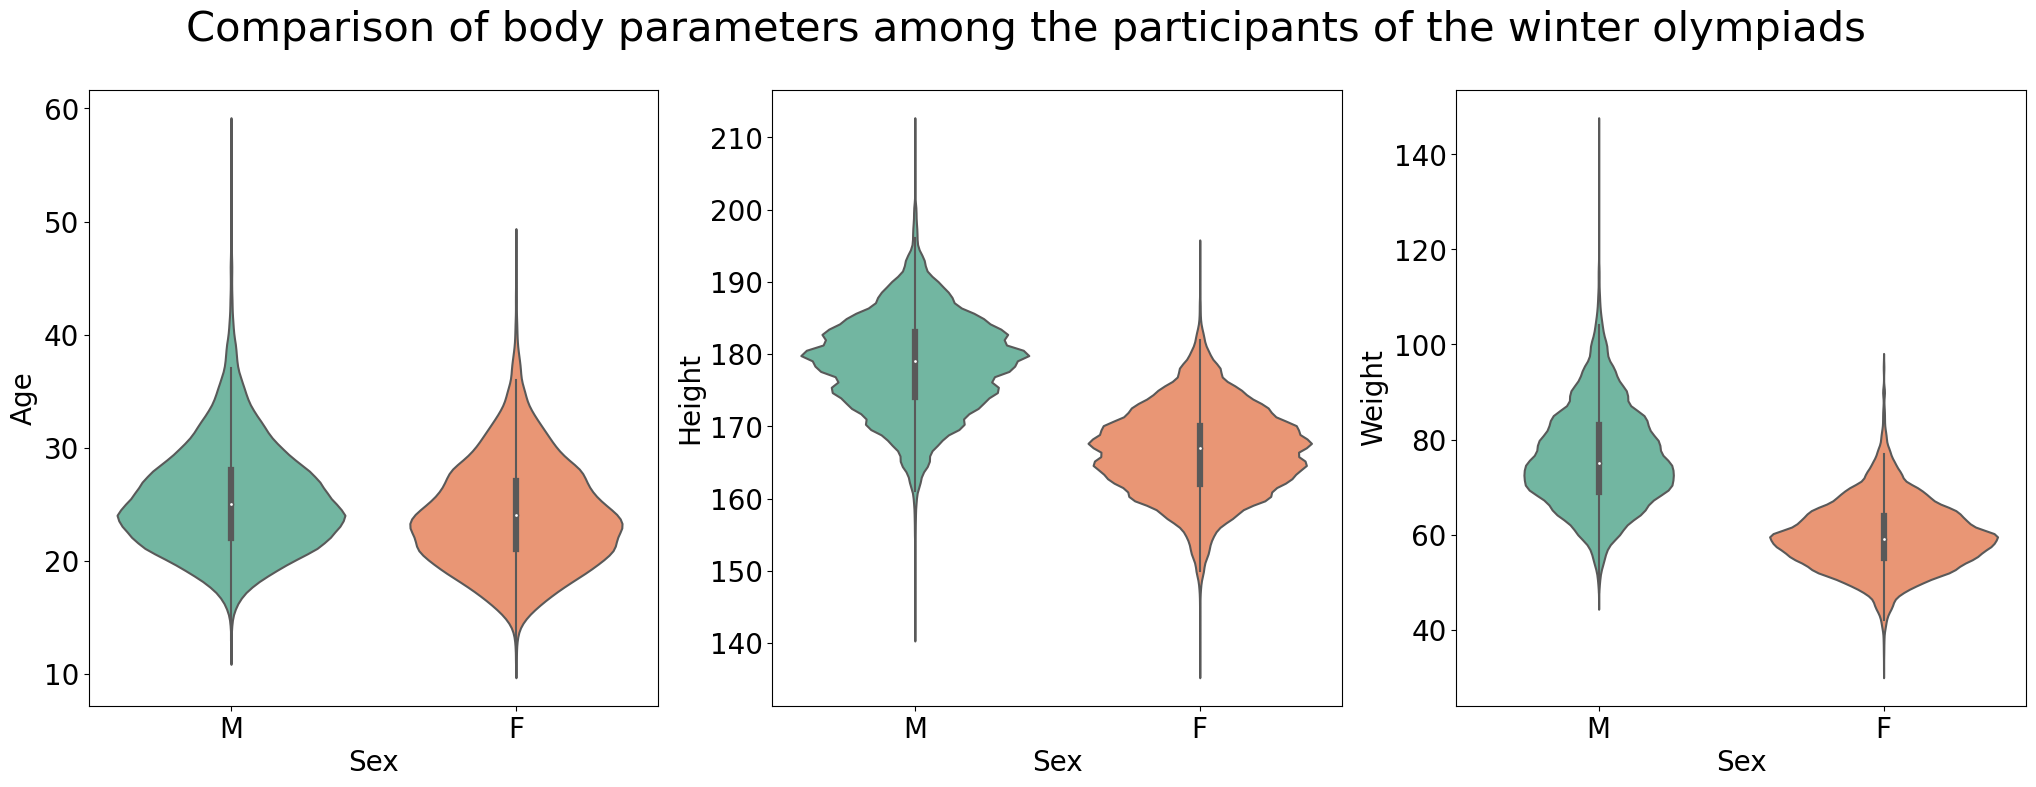

In [21]:
data_subset = data_filt.query('Season == "Winter"')

plt.rcdefaults() 
plt.rcParams['figure.figsize']  = [25, 8]
plt.rcParams['font.size'] = '20'

fig, axes = plt.subplots(ncols=3)

sns.violinplot(x="Sex", y="Age", data=data_subset, ax=axes[0], palette= 'Set2')
sns.violinplot(x="Sex", y="Height", data=data_subset, ax=axes[1], palette= 'Set2')
sns.violinplot(x="Sex", y="Weight", data=data_subset, ax=axes[2], palette= 'Set2')
plt.suptitle("Comparison of body parameters among the participants of the winter olympiads", size = 30) 

##### Task 15
Нас особенно интересуют переменные Team и Medal. Что ты можешь про них
сказать? Есть ли у нас основания предполагать, что они могут быть взаимосвязаны?
Как ты это определил?

##### Task 16
Задание “со звездочкой” (дополнительное). В нем предполагается выдвинуть и
проверить несколько гипотез в рамках тех методов, которые мы освоили (все, что
вам покажется интересным). Здесь нет правильного решения, будет оцениваться
ваше умение применять изученные методы и интерпретировать полученные
результаты. 

In [29]:
data_filt.to_csv('data/data_processed.csv')